<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Relevant-Imports" data-toc-modified-id="Relevant-Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Relevant Imports</a></span></li><li><span><a href="#Read-the-Data" data-toc-modified-id="Read-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read the Data</a></span></li><li><span><a href="#Data-Description:" data-toc-modified-id="Data-Description:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Description:</a></span></li><li><span><a href="#Data-Distribution:" data-toc-modified-id="Data-Distribution:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Distribution:</a></span><ul class="toc-item"><li><span><a href="#Continuous-Data-:" data-toc-modified-id="Continuous-Data-:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Continuous Data :</a></span><ul class="toc-item"><li><span><a href="#Tenure:" data-toc-modified-id="Tenure:-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Tenure:</a></span></li><li><span><a href="#Monthly-Charges:" data-toc-modified-id="Monthly-Charges:-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Monthly Charges:</a></span></li><li><span><a href="#Total-Charges:" data-toc-modified-id="Total-Charges:-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Total Charges:</a></span></li></ul></li><li><span><a href="#Categorical-Data:" data-toc-modified-id="Categorical-Data:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Categorical Data:</a></span><ul class="toc-item"><li><span><a href="#Bar-plots:" data-toc-modified-id="Bar-plots:-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Bar plots:</a></span></li><li><span><a href="#Pie-Charts" data-toc-modified-id="Pie-Charts-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Pie Charts</a></span></li></ul></li></ul></li></ul></div>

Some of the things we need to do 

Continuous variables : 
Use histograms to plot the distributions of different variables.

Averages (medians, means ... ) , dispersion , variance, symmetry, outliers, how to handle the outliers

Categorical variables : pie charts , bar charts
The Mode ( The category which is the most frequent)

Bivariate analysis (depends on the type) : 
Correlation for continuous
contingency table and chi square test for categorical

Categorical and continuous : Anova, t-test ...


Multivariate Analysis:


# Relevant Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the Data

In [2]:
path = './Data/Telco-Customer-Churn.csv'
data = pd.read_csv(path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Description:

In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

** Here we can see that there is no missing data for all the columns which means that we don;t have to deal with this issue .**

# Data Distribution:

## Continuous Data :

### Tenure:

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


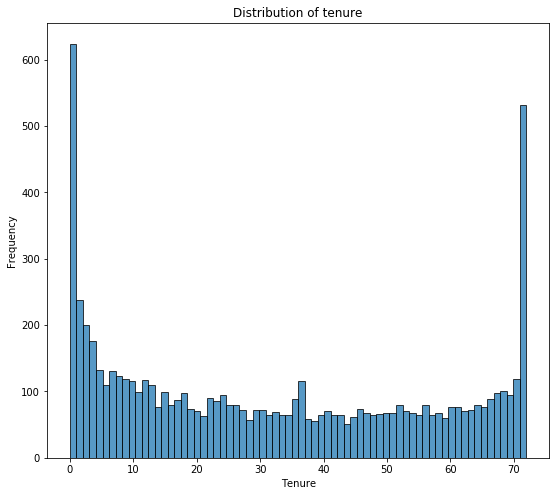

In [6]:
print(data['tenure'].describe())
plt.figure(figsize=(9, 8))
plt.hist(data['tenure'], bins=70, alpha=0.75, edgecolor='black')
plt.title('Distribution of tenure')
plt.ylabel('Frequency')
plt.xlabel('Tenure')

**We can see that the plot here is quite symmetrical around the 35 mark which is close to the mean**

### Monthly Charges:

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


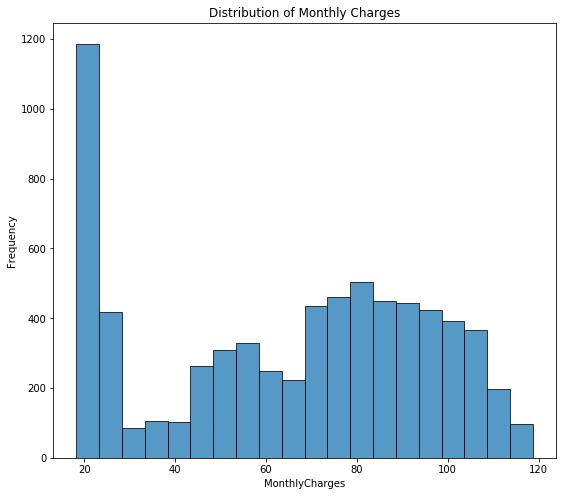

In [7]:
print(data['MonthlyCharges'].describe())
plt.figure(figsize=(9, 8))
plt.hist(data['MonthlyCharges'], bins=20, alpha=0.75, edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.ylabel('Frequency')
plt.xlabel('MonthlyCharges')

**We can see that the plot here is skewed to the left which means that most people have low monthly charges**

### Total Charges:

In [8]:
# Row 488 gives us problems in this case let's see what it contains
data.loc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [9]:
for i in range(data.shape[0]):
    try:
        float(data['TotalCharges'].loc[i])
    except:
        print(i)

488
753
936
1082
1340
3331
3826
4380
5218
6670
6754


**it seems like the only problem here is totalCharges' value, we will see the distribution without it here. And then we can fix it by changing the value to the median of the column**

In [10]:
indices_tochange = [
    488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754
]

# Remove empty strings that look like the one from pos 488 and convert to float
TotalCharges = [
    float(data['TotalCharges'].values[i]) for i in data.index
    if i not in indices_tochange
]

In [11]:
for i in indices_tochange:
    data['TotalCharges'].loc[i] = str(np.median(TotalCharges))

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


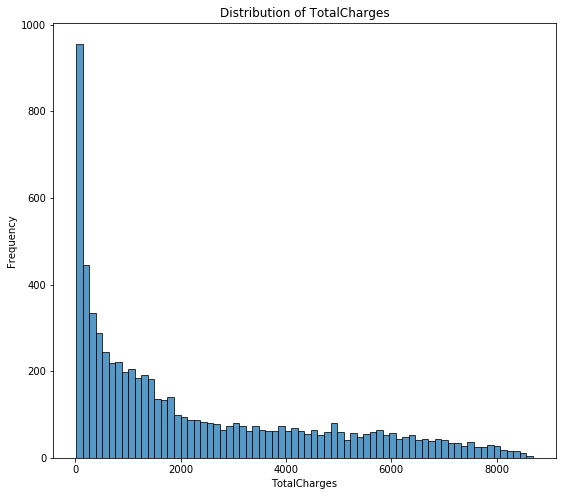

In [12]:
plt.figure(figsize=(9, 8))
plt.hist(TotalCharges, bins=70, alpha=0.75, edgecolor='black')
plt.title('Distribution of TotalCharges')
plt.ylabel('Frequency')
plt.xlabel('TotalCharges')

**We can see that the total charges decay exponentially **

In [13]:
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'].describe()

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

## Categorical Data:

### Bar plots:

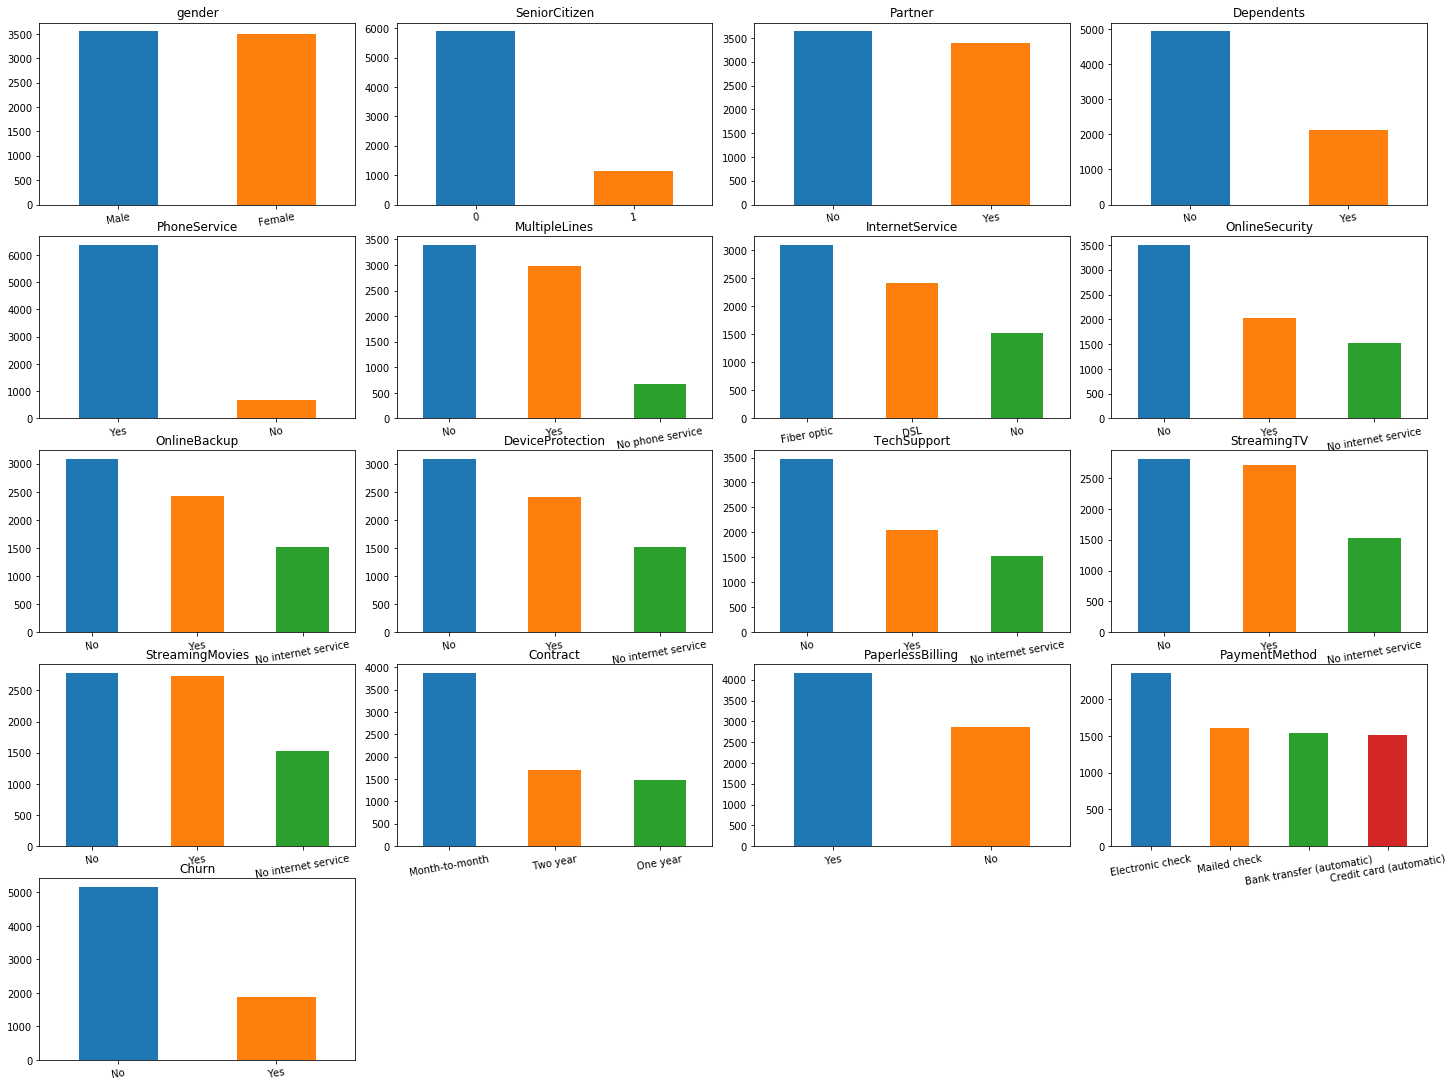

In [73]:
fig, axes = plt.subplots(5, 4, figsize=(20, 15))
# Add space between subplots
fig.tight_layout()

# Fill the subplots
i = 0
for column in data.columns:
    #     In order not to plot the continuous variables
    if column not in [
            'customerID', 'TotalCharges', 'MonthlyCharges', 'tenure'
    ]:
        data[column].value_counts().plot(
            kind='bar', ax=axes[(i // 4, i % 4)], title=column, rot=10)
        i += 1

# Remove unnecessary suplots:
for i in range(1, 4):
    fig.delaxes(axes[4][i])

### Pie Charts

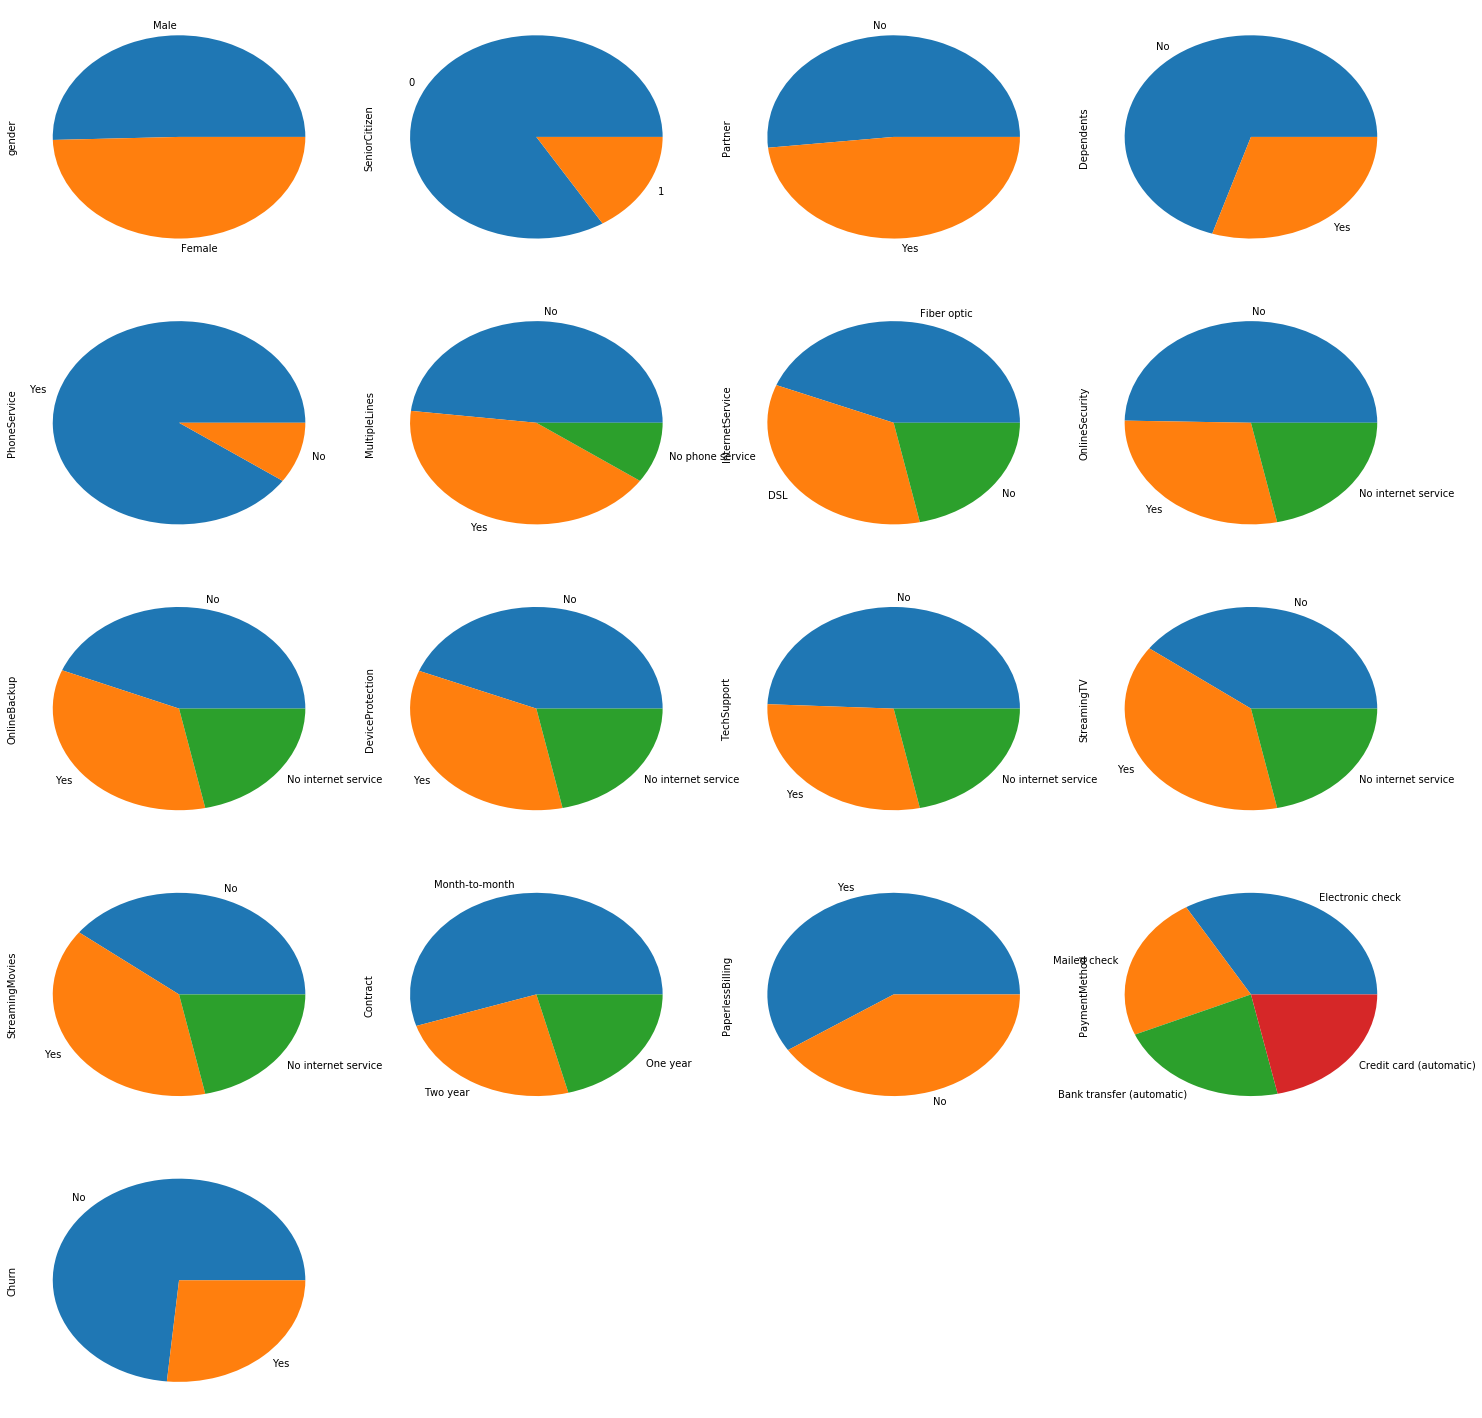

In [79]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
# Add space between subplots
fig.tight_layout()

# Fill the subplots
i = 0
for column in data.columns:
    #     In order not to plot the continuous variables
    if column not in [
            'customerID', 'TotalCharges', 'MonthlyCharges', 'tenure'
    ]:
        data[column].value_counts().plot(kind='pie', ax=axes[(i // 4, i % 4)])
        i += 1

# Remove unnecessary suplots:
for i in range(1, 4):
    fig.delaxes(axes[4][i])